<a href="https://colab.research.google.com/github/Altynny/EfficientNet_SRH_6000Mhz/blob/main/notebooks/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Данные

Изображения были размечены вручную на сайте https://forecasting.iszf.irk.ru/, результатом чего стал архив с изображениями и CSV-отчёт с именами файлов и их классами.

Датасет подготовлен с помощью кода блокнота [ds_prep.ipynb](https://colab.research.google.com/drive/1li5OpToaFn8jtWDMmRy6YYcYjVCAG_Wv) и доступен [по ссылке](https://drive.google.com/file/d/1RWCqP1Ttm3J-BnQClH9qzdhDSXbAKUwS/view?usp=drive_link) (Google drive).

В процессе обработки отфильтровываются повреждённые изображения и данные принимают следующую структуру:

```
data/
├── train/      # 60%        
│   ├── Ok/         
│   └── Bad/        
├── val/        # 20%     
│   ├── Ok/         
│   └── Bad/        
└── test/       # 20%    
    ├── Ok/         
    └── Bad/        

```

Поскольку размеченные данные хранятся на Google Drive и не могут быть установлены напрямую с помощью запросов из-за размера, лучше всего подключить Google Colab к диску:

In [4]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!unzip -qq drive/MyDrive/SRH_dataset/data6000.zip

# Модель

Код обучения модели - [model_training.ipynb](https://colab.research.google.com/drive/1dVyhd9eLFgyG__RA9dsqUw39xCcmKnvF?usp=sharing)

In [7]:
!git clone https://github.com/Altynny/EfficientNet_SRH_6000Mhz Effnet

Cloning into 'Effnet'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 40 (delta 1), reused 7 (delta 1), pack-reused 31 (from 1)
Receiving objects: 100% (40/40), 47.87 MiB | 30.48 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [3]:
!mkdir fig

# Проверка сети

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Evaluating: 100%|██████████| 62/62 [03:04<00:00,  2.97s/it]


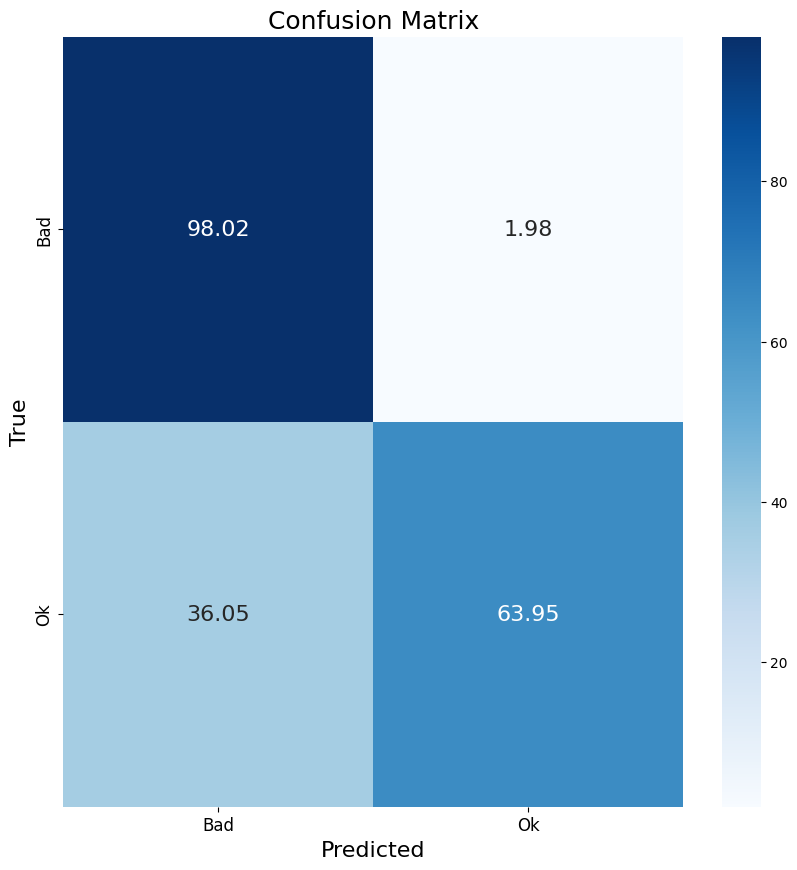

In [6]:
from Effnet.EffnetClassifier import EffnetClassifier
version = 'b0'
model = EffnetClassifier(model_name=f'efficientnet_{version}')
model.set_num_classes(2)
mode = input('Введите режим работы ')
DATA_DIR = '../data'

match mode:
  case 'train':
    model.get_efficientnet_dataloaders(data_dir=f'Effnet/{DATA_DIR}', batch_size=32)
    model.train(
        num_epochs_stage1=40,
        num_epochs_stage2=80,
        learning_rate_stage1=1e-3,
        learning_rate_stage2=1e-4,
        unfreeze_depth=3
    )
    model.save_model(f'Effnet/models/b0_6000.pth')
  case 'eval':
    model.load_model(f'Effnet/models/b0_6000.pth')
    model.get_efficientnet_dataloaders(data_dir=f'Effnet/{DATA_DIR}', batch_size=32)
    model.confusion_matrix()
  case 'predict':
    model.load_model(f'Effnet/models/b0_6000.pth')
    model.predict('https://ftp.rao.istp.ac.ru/SRH/SRH0306/cleanMaps/20210712/srh_I_2021-07-12T01:59:42_3100.fit')